# Project 1
Yunus Emre Altun, Fabian Milla

**Dataset:**
[Energy Efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency)

**1.** Business understanding and data collection  
   *a)* Inform yourself about the listed datasets. What are they about? What are the analysis goals?  
   *b)* Select the dataset that interests you the most. Create a python notebook and describe your understanding about the dataset.  
   *c)* Download the data and save it in a pandas data frame.

**Answer 1**  
*a)* The data deals with the energy efficiency of buildings, focusing on heating and cooling loads in relation to different building shapes. The dataset includes 8 input features wich describe the physical and structural properties of buildings. The goal of the analysis is to predict two target variables: heating load (Y1) and cooling load (Y2)  
*c)*  First import libraries, then create a new directory to save the dataset, and finally get the data from the URL.

In [9]:
from pathlib import Path
import pandas as pd
import urllib.request

excel_path = Path("datasets/energy_efficiency.xlsx")

# Does data exist already 
if not excel_path.is_file():
    # create directory if it does not exist
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
    # download data
    urllib.request.urlretrieve(url, excel_path)
   
# load data in pandas dataframe
data = pd.read_excel(excel_path)

In [10]:
# print head to get an idea of what it looks like
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


**2.** Data exploration  
a) How many variables and instances does the dataset contain?  
b) Do the variables have understandable names? If not, think about renaming.  
c) Explore the data statistically and visually. How is the data distributed?  
d) Do you observe any correlations? If yes, between which variables?  

**Answer 2**  
*a)* The dataset contains 10 variables, 8 features, 2 targets, and 768 instances.  
*b)* The variables have understandable names. Only the orientation could be a bit confusing because integers were used instead of north, south, etc.  
*c)*  

In [11]:
# get first impressions
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


**Description**  
There are no null values, so no missing values.

In [12]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


**Description**  
*count:* Count of non-null values  
*mean:* Average value  
*std:* Standard deviation, indicating how much the values are spread around the mean  
*min:* Minimum value  
*25%:* 25th percentile, 25% of data is below the value  
*50%:* Median or 50th percentile  
*75%:* 75th percentile, 75% of data is below the value  
*max:* Maximum value

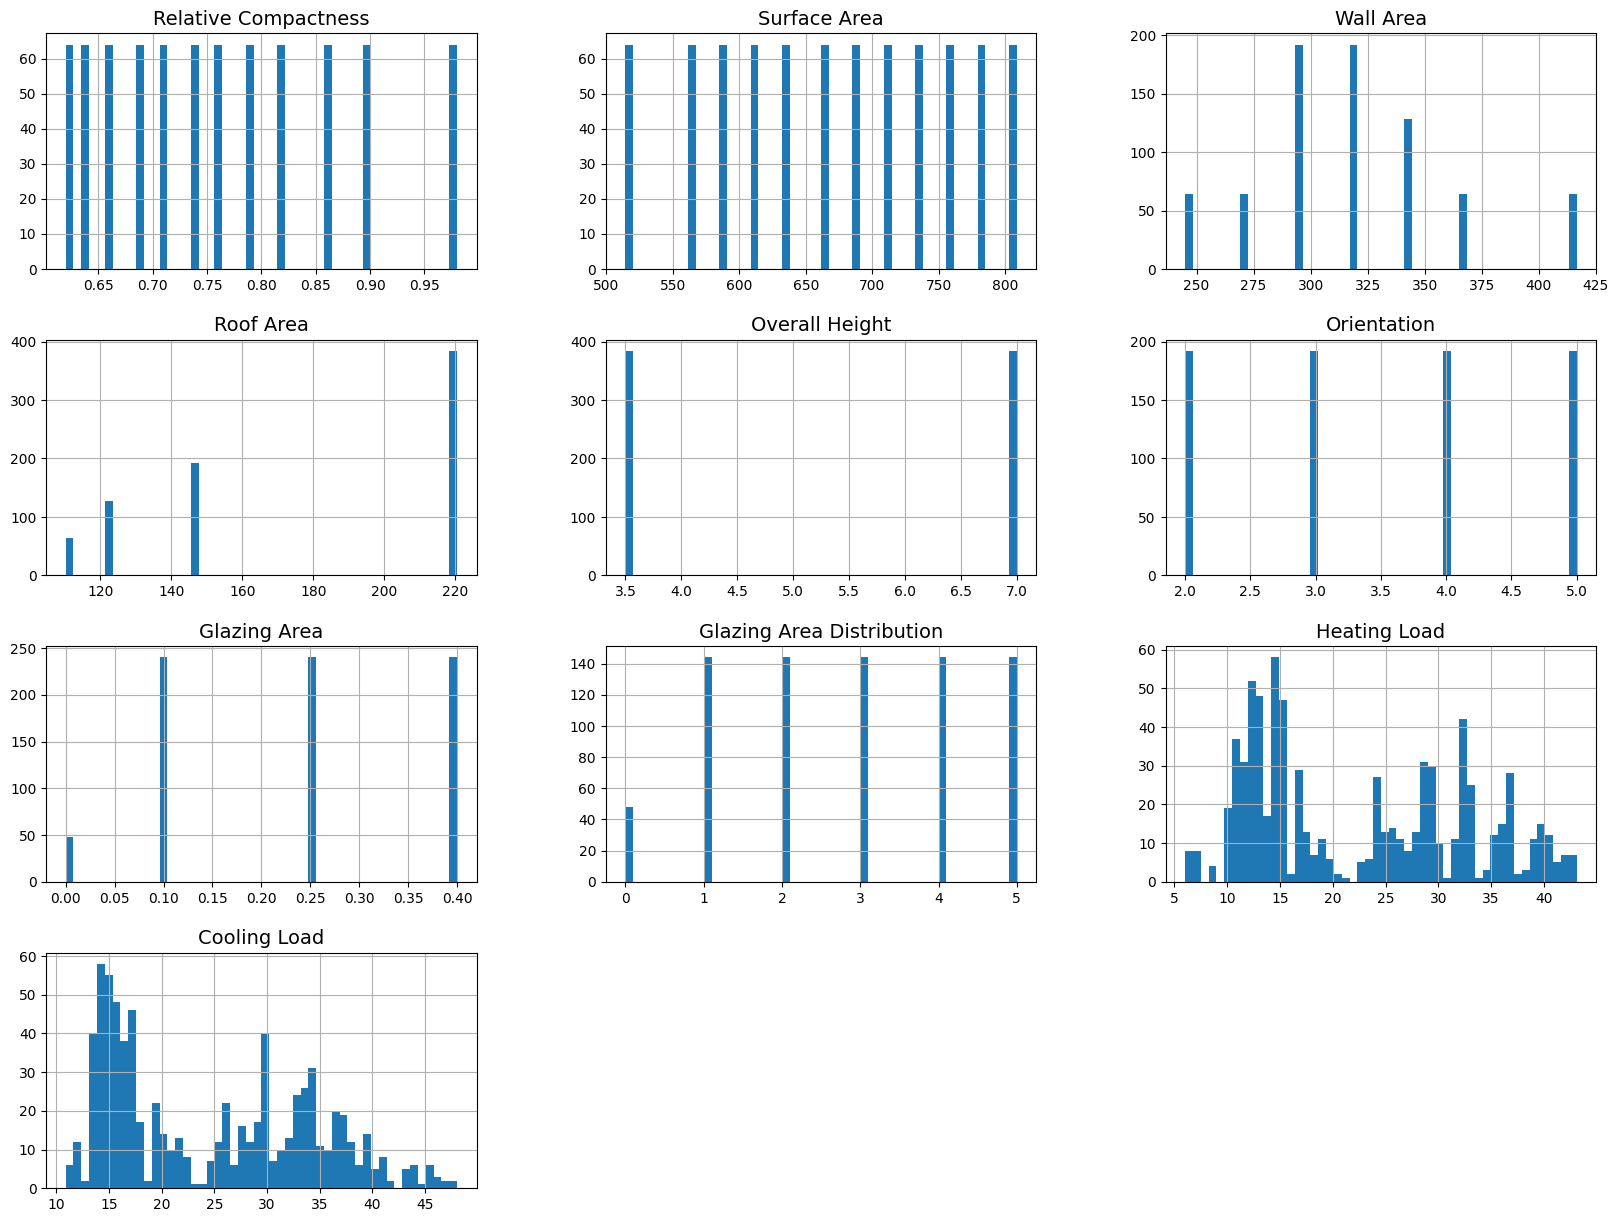

In [13]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# feature names
feature_names = {
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing Area',
    'X8': 'Glazing Area Distribution',
    'Y1': 'Heating Load',
    'Y2': 'Cooling Load'
}

# Plot
data.hist(bins=50, figsize=(20, 15))
for ax in plt.gcf().axes:
    feature = ax.get_title()
    ax.set_title(feature_names.get(feature, feature))
plt.show()

**Antwort:**
Die Verteilungen der Variablen im Datensatz zeigen unterschiedliche Muster:

- **Relative Compactness**: Diese Variable hat eine relativ gleichmäßige Verteilung und weist eine breite Streuung der Werte auf.
- **Surface Area**: Ähnlich wie bei der ersten Variablen scheint die `Surface Area` ebenfalls eine gleichmäßige Verteilung mit einem Bereich zwischen 500 und 800 zu haben.
- **Wall Area**: Hier sehen wir eine ungleichmäßige Verteilung, mit Werten, die hauptsächlich zwischen 250 und 400 liegen. Es gibt einige Ausreißer im Bereich von etwa 425.
- **Roof Area**: Diese Variable weist eine starke Konzentration bei bestimmten Werten auf (in der Nähe von 120 bis 160), mit vereinzelten Werten bis 220.
- **Overall Height**: Diese Variable hat eine nahezu konstante Verteilung, wobei der Wertebereich von 3,5 bis 7 reicht.
- **Orientation**: Es gibt fünf verschiedene Orientierungen, die gleichmäßig im Datensatz vertreten sind, jedoch scheinen einige Werte wiederholt zu erscheinen.
- **Glazing Area**: Diese Variable zeigt eine starke Konzentration bei sehr niedrigen Werten, hauptsächlich zwischen 0 und 0,04, was auf eine starke Fokussierung auf einen bestimmten Bereich hinweist.
- **Glazing Area Distribution**: Auch hier sind die Werte relativ gleichmäßig verteilt, mit einer höheren Häufigkeit bei den Werten 1 bis 3.
- **Heating Load**: Die Verteilung der `Heating Load` ist breit, aber mit einer höheren Häufigkeit bei den unteren Werten, während die Werte ab etwa 25 bis 40 weniger häufig vorkommen.
- **Cooling Load**: Die Verteilung des `Cooling Load` zeigt eine deutlich ungleichmäßige Verteilung, mit einer höheren Häufigkeit im Bereich von 10 bis 30 und einem schnell abnehmenden Vorkommen bei höheren Werten.

Insgesamt zeigen die Daten, dass einige Variablen relativ gleichmäßig verteilt sind, während andere (insbesondere die Zielvariablen) eine eher ungleichmäßige Verteilung mit gewissen Konzentrationen aufweisen.


**Discription**  


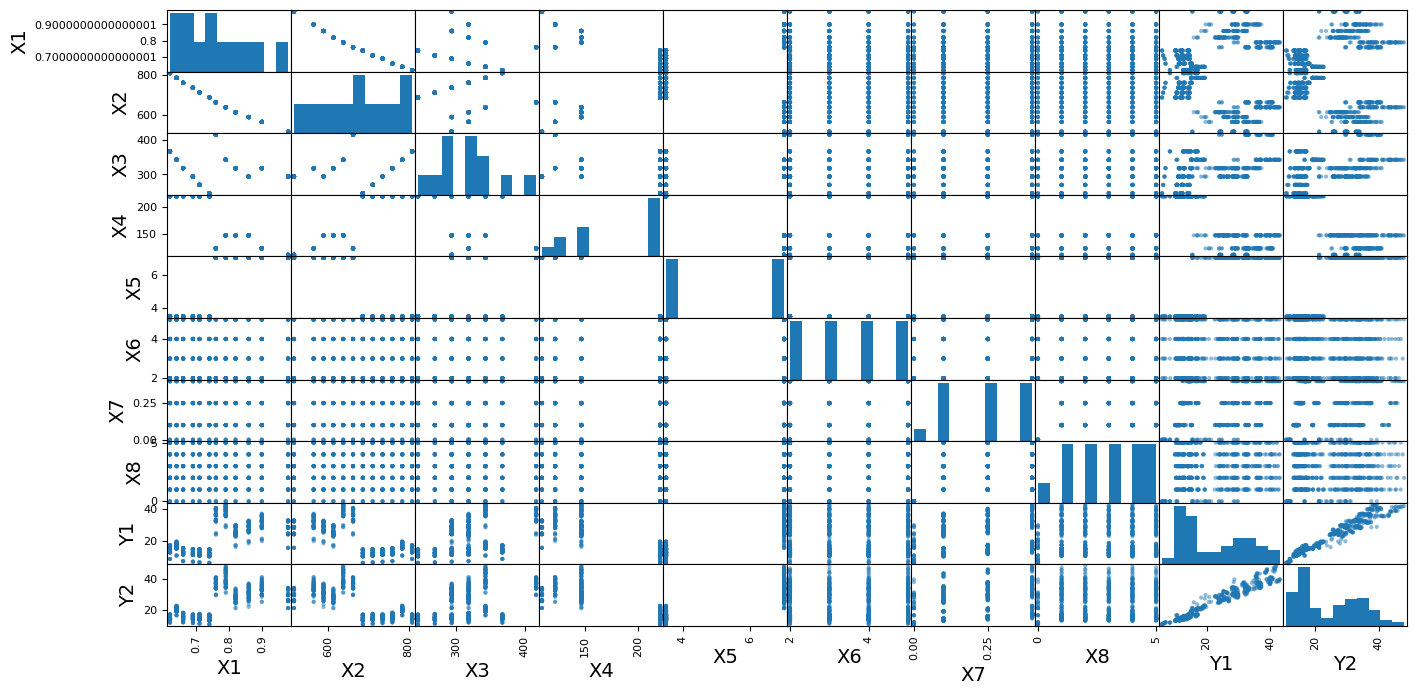

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(16, 8))
plt.show()

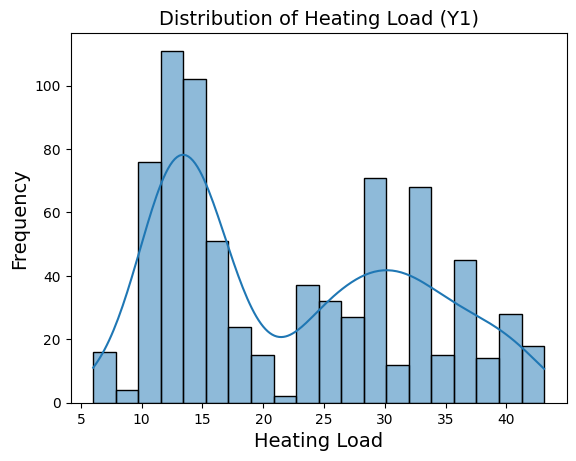

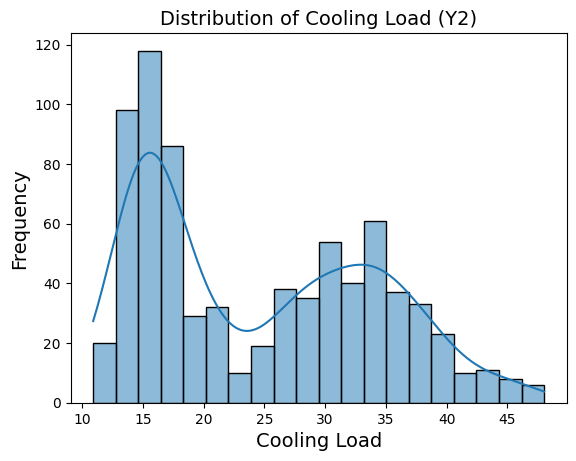

In [15]:
import seaborn as sns

sns.histplot(data['Y1'], kde=True, bins=20)
plt.title('Distribution of Heating Load (Y1)')
plt.xlabel('Heating Load')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data['Y2'], kde=True, bins=20)
plt.title('Distribution of Cooling Load (Y2)')
plt.xlabel('Cooling Load')
plt.ylabel('Frequency')
plt.show()

Die Plots zeigen die Verteilung der Heizlast (Y1) und Kühlungsanforderungen (Y2) in den Gebäuden. Sie helfen dabei, Muster oder Ausreißer in den Daten zu identifizieren, wie zum Beispiel:

Heizlast (Y1): Gibt an, wie viel Energie zum Heizen der Gebäude benötigt wird. Eine gleichmäßige Verteilung oder Konzentration in bestimmten Bereichen zeigt die typischen Heizanforderungen.

Kühlungsanforderungen (Y2): Zeigt die Energieanforderungen zur Kühlung der Gebäude. Hier kann eine ähnliche Analyse aufzeigen, welche Gebäude mehr Kühlung benötigen.

Diese Informationen helfen, die Energieeffizienz und -anforderungen der Gebäude zu verstehen.

*d)*

In [16]:
corr_matrix = data.corr()
print(corr_matrix)

              X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  4.678592e-17 -3.459372e-17 -2.429499e-17 -5.830058e-17  4.492205e-17   
X7 -2.960552e-15  3.636925e-15 -8.567455e-17 -1.759011e-15  1.489134e-17   
X8 -7.107006e-16  2.438409e-15  2.067384e-16 -1.078071e-15 -2.920613e-17   
Y1  6.222719e-01 -6.581199e-01  4.556714e-01 -8.618281e-01  8.894305e-01   
Y2  6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

              X6            X7            X8        Y1        Y2  
X1  4.678592e-17 -2.960552e-15 -7.107006e-16  0.622272  0.634339  
X2 -3.459372e-17  3.636925e-1

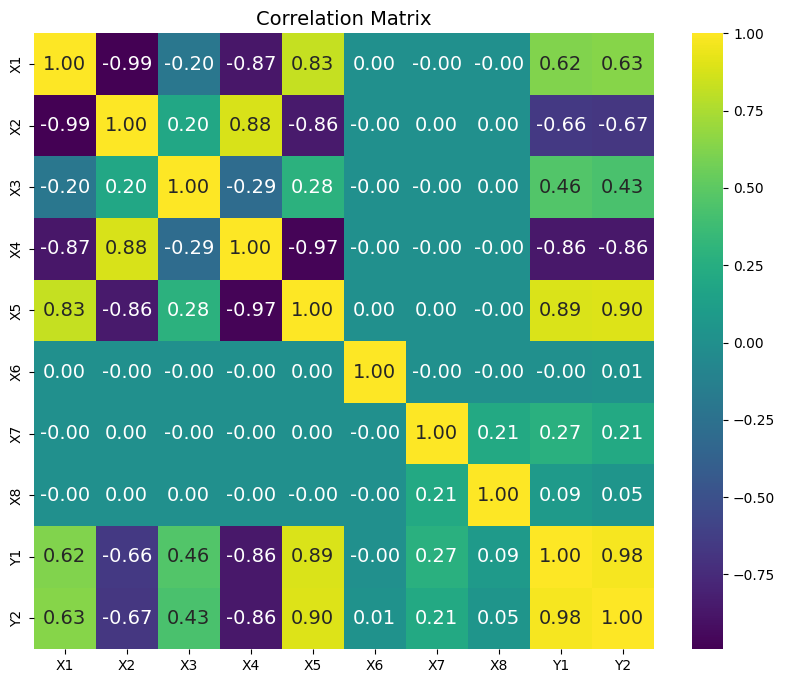

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

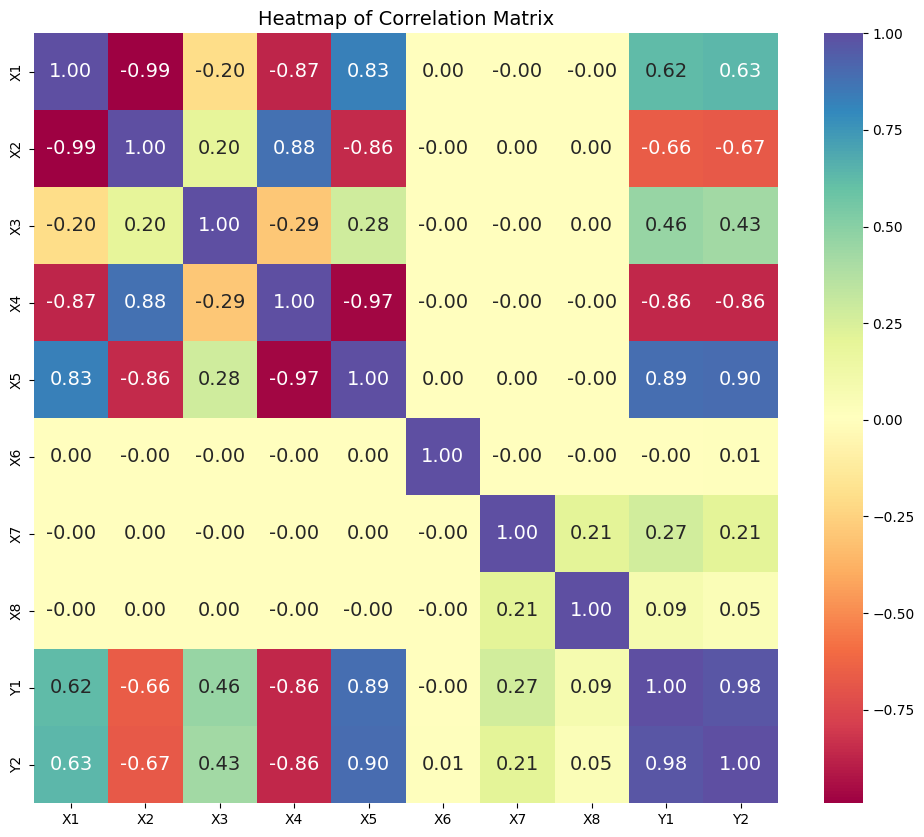

In [18]:
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt=".2f")
plt.title("Heatmap of Correlation Matrix")
plt.show()

**Description**  
X1 (Relative Compactness) and X2 (Surface Area) have a high negative correlation, indicating that buildings with higher compactness tend to have a smaller total surface area.  
X4 (Roof Area) and X5 (Overall Height) have a strong negative correlation (-0.97). Taller buildings typically have smaller roof areas.  
X5 (Overall Height) and X1 (Relative Compactness) have a strong correlation with Y1 and Y2.  
X4 (Roof Area) and X2 (Surface Area) have a strong negative correlation with Y1 and Y2.

**3.** Data preparation  
a) Is data cleaning needed?  
b) Is data encoding needed?  
c) Do you think any further feature engineering would be useful?  
d) Split the data into data subsets.  
e) Is feature scaling needed?  


In [19]:
data.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [20]:
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

**Answer 3**  
*a)* No, the data does not need to be cleaned.  
*b)* All the feature data is only numeric, and also the target variable is already numeric, so no more encoding is required.  
*c)* 
1. **Skalierung der Features**: Einige Variablen wie **Surface Area** und **Wall Area** könnten größere Werte haben. Hier könnte eine Skalierung helfen, damit das Modell besser lernt.
   
2. **Neue Features erstellen**: Zum Beispiel könnte man die Fläche von Wänden und Fenstern kombinieren, um ein neues Merkmal zu schaffen, das Einfluss auf den Energieverbrauch haben könnte.

3. **Binning**: Features wie **Orientation** oder **Glazing Area Distribution** in Gruppen aufteilen, um Muster zu erkennen. 

*d)*  

In [21]:
X = data.drop(columns=['Y1', 'Y2'])
y = data[['Y1', 'Y2']]
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


*e)* Ja, Feature Scaling könnte hilfreich sein, besonders für Modelle wie lineare Regression oder KNN, die empfindlich gegenüber unterschiedlichen Skalen der Features sind.

Einige Features wie Surface Area oder Wall Area haben größere Werte im Vergleich zu anderen, was das Modell verzerren könnte. Durch Skalierung (z.B. Min-Max- oder Standardisierung) werden alle Features auf eine vergleichbare Skala gebracht, was die Modellleistung verbessern kann.

**Discription**  
Split data into X and targets in y

In [22]:
from sklearn.model_selection import train_test_split

seed_val = 42

# Split the data into 80% train set + 20 % temp set (= val + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=seed_val)

# Split the temp set further into 50% val + 50 % test set (i.e. train/val/test = 80%/10%/10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed_val)

In [23]:
print("Size of TRAIN data:", len(X_train))
print("Size of VAL data:", len(X_val))
print("Size of TEST data:", len(X_test))

Size of TRAIN data: 614
Size of VAL data: 77
Size of TEST data: 77


*e)* Ja, Feature Scaling könnte hilfreich sein, besonders für Modelle wie lineare Regression oder KNN, die empfindlich gegenüber unterschiedlichen Skalen der Features sind.

Einige Features wie Surface Area oder Wall Area haben größere Werte im Vergleich zu anderen, was das Modell verzerren könnte. Durch Skalierung (z.B. Min-Max- oder Standardisierung) werden alle Features auf eine vergleichbare Skala gebracht, was die Modellleistung verbessern kann.

**4.** Modelling: Regression (= model 1)  
a) Define again the analysis goal. What is the target variable that you want to predict? (Remark - If
you use the “energy” dataset: It is enough to predict only one target variable.) Which features
do you want to use?  
b) Select a model, define a performance metric, select a learning algorithm.  
c) Run the learning algorithm. Monitor the learning curves. What do you observe? How is the
model performance?  
d) Is fine-tuning needed? Try, e.g., other hyperparameters.  
e) Try regularization techniques. What is the effect?  
f) Save the final model, perform a final evaluation and demonstrate how it can be used for making
predictions.


**Answer 4**  
*a)* We want to predict the Target Y1 Heating load, with the freatures Relative Compactness (X1), Surface Area (X2), Wall Area (X3), Roof Area (X4), Overall Height (X5), Orientation (X6), Glazing Area (X7), Glazing Area Distribution (X8).  
*b)* 

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 7.90
Mean Absolute Error (MAE): 1.96
R² Score: 0.92


- Mean Squared Error indicates that the predicted values deviate slightly from the true values  
- Mean Absolute Error means that predictions are, on average, showing the model is accurate
- The R² score is strong, demonstrating good predictive performance

4 c)

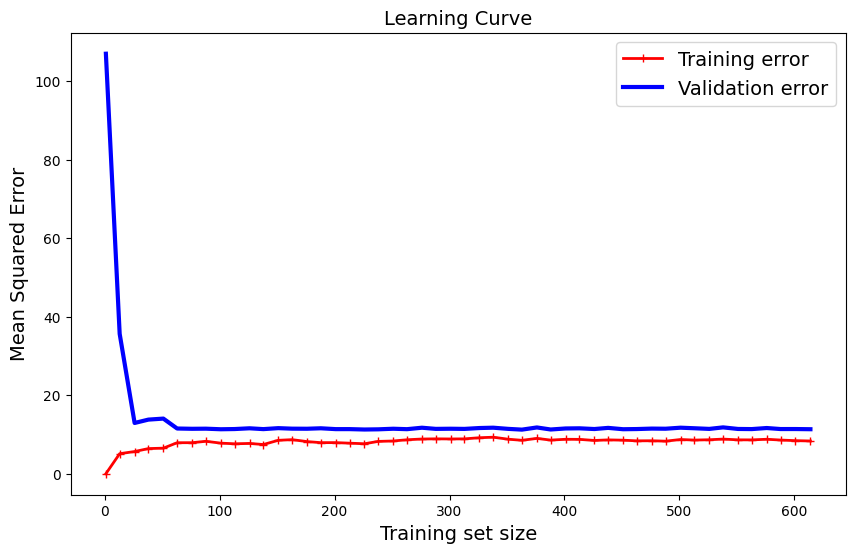

In [59]:
train_errors, val_errors = [], []
train_sizes = np.linspace(1, len(X_train), 50, dtype=int)

for m in train_sizes:
    model.fit(X_train[:m], y_train['Y1'][:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train['Y1'][:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val['Y1'], y_val_predict))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Training error")
plt.plot(train_sizes, val_errors, "b-", linewidth=3, label="Validation error")
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()


The learning curves show that the training error increases as the training set size increases, while the validation error decreases initially and then stabilizes. This indicates that the model is learning and generalizing well to new data. The final model performance is good, with a low mean squared error and a high R² score, indicating that the model explains a large portion of the variance in the target variable.


d)

Fine-tuning the model can help improve its performance. We can try different hyperparameters for the logistic regression model, such as the regularization strength (C) and the solver. Here, we will use GridSearchCV to find the best hyperparameters.


4 e)

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create a categorical class variable by binning the continuous target variable Y1
data['Y1_binned'] = pd.cut(data['Y1'], bins=3, labels=['low', 'medium', 'high'])

# Define features and target for classification
X_classification = X
y_classification = data['Y1_binned']

# Split the data into training and validation sets
X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['lbfgs', 'liblinear', 'saga']
}

# Define the pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='multinomial', max_iter=1000))
])

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_class, y_train_class)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Train the logistic regression model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_class, y_train_class)

# Predict on train and validation sets
y_train_pred = best_model.predict(X_train_class)
y_val_pred = best_model.predict(X_val_class)

# Print classification reports
print("Classification Report for Training Set:")
print(classification_report(y_train_class, y_train_pred))

print("Classification Report for Validation Set:")
print(classification_report(y_val_class, y_val_pred))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Pytho

Best parameters found:  {'logreg__C': 0.1, 'logreg__solver': 'lbfgs'}
Best cross-validation accuracy: 0.91
Classification Report for Training Set:
              precision    recall  f1-score   support

        high       0.88      0.92      0.90       157
         low       0.96      0.97      0.97       308
      medium       0.85      0.79      0.82       149

    accuracy                           0.92       614
   macro avg       0.90      0.89      0.90       614
weighted avg       0.91      0.92      0.91       614

Classification Report for Validation Set:
              precision    recall  f1-score   support

        high       0.90      0.81      0.85        43
         low       0.94      0.99      0.96        69
      medium       0.79      0.81      0.80        42

    accuracy                           0.89       154
   macro avg       0.88      0.87      0.87       154
weighted avg       0.89      0.89      0.89       154



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Fram

4 f)

In [44]:
import joblib

# Save the final model to a file
model_filename = 'final_model.pkl'
joblib.dump(best_model, model_filename)

# Load the model from the file
loaded_model = joblib.load(model_filename)

# Apply binning to the test set target variable
y_test['Y1_binned'] = pd.cut(y_test['Y1'], bins=3, labels=['low', 'medium', 'high'])

# Perform a final evaluation on the test set
y_test_pred = loaded_model.predict(X_test)

# Print classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(y_test['Y1_binned'], y_test_pred))

# Demonstrate how the model can be used for making predictions
# Example: Predict the class for a new sample
new_sample = [[0.75, 650, 300, 120, 7, 3, 0.1, 2]]  # Example feature values
predicted_class = loaded_model.predict(new_sample)
print(f"Predicted class for the new sample: {predicted_class[0]}")

Classification Report for Test Set:
              precision    recall  f1-score   support

        high       1.00      0.65      0.79        23
         low       0.95      1.00      0.97        39
      medium       0.62      0.87      0.72        15

    accuracy                           0.87        77
   macro avg       0.86      0.84      0.83        77
weighted avg       0.90      0.87      0.87        77

Predicted class for the new sample: medium


C:\Users\yunus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


By fine-tuning the hyperparameters, we aim to improve the models performance on the validation set. The grid search will help us find the best combination of hyperparameters for the logistic regression model.


In [42]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train['Y1'])
ridge_y_pred = ridge_model.predict(X_val)

ridge_mse = mean_squared_error(y_val['Y1'], ridge_y_pred)
ridge_mae = mean_absolute_error(y_val['Y1'], ridge_y_pred)
ridge_r2 = r2_score(y_val['Y1'], ridge_y_pred)

print("Ridge Regression:")
print(f"Mean Squared Error (MSE): {ridge_mse:.2f}")
print(f"Mean Absolute Error (MAE): {ridge_mae:.2f}")
print(f"R² Score: {ridge_r2:.2f}")

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train['Y1'])
lasso_y_pred = lasso_model.predict(X_val)

lasso_mse = mean_squared_error(y_val['Y1'], lasso_y_pred)
lasso_mae = mean_absolute_error(y_val['Y1'], lasso_y_pred)
lasso_r2 = r2_score(y_val['Y1'], lasso_y_pred)

print("\nLasso Regression:")
print(f"Mean Squared Error (MSE): {lasso_mse:.2f}")
print(f"Mean Absolute Error (MAE): {lasso_mae:.2f}")
print(f"R² Score: {lasso_r2:.2f}")

Ridge Regression:
Mean Squared Error (MSE): 11.98
Mean Absolute Error (MAE): 2.60
R² Score: 0.89

Lasso Regression:
Mean Squared Error (MSE): 12.82
Mean Absolute Error (MAE): 2.63
R² Score: 0.88


**5.** Modelling: Classification (= model 2)  
a) Define again the analysis goal. What is the target variable that you want to predict? Which features do you want to use?  
i. Remark - If you use the “bike” or the “energy” dataset: You first need to create a categorical class variable by binning the originally continuous target variable. You can use the code below for that.  
b) Train a logistic regression model for multinomial classification.  
c) Evaluate the performance on the train and the validation subset. Which performance measures do you use, and why? How good is the performance? Is the performance similar for all classes?  
d) Do you have any idea, if something coul d be improved for the classification model?  
i. If yes, make those adaptations and train a new classification model. Afterwards measure the performance on the validation set. Has the performance improved?  
e) Optional: Train another type of a classification model (e.g., decision tree, or SVM).  
f) Select your best classification model (from b), d), and e)) and measure the performance on the
test subset.


**5.** Modelling: Classification (= model 2)  
*a)* Define again the analysis goal. What is the target variable that you want to predict? Which features do you want to use?  
The analysis goal is to classify buildings based on their energy efficiency. The target variable is a categorical class variable created by binning the continuous target variable (Y1 or Y2). The features used for classification are the same as those used for regression:
- Relative Compactness (X1)
- Surface Area (X2)
- Wall Area (X3)
- Roof Area (X4)
- Overall Height (X5)
- Orientation (X6)
- Glazing Area (X7)
- Glazing Area Distribution (X8)



In [63]:
# 5 b) Classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Create a categorical class variable by binning the continuous target variable Y1
data['Y1_binned'] = pd.cut(data['Y1'], bins=3, labels=['low', 'medium', 'high'])

# Define features and target for classification
X_classification = X
y_classification = data['Y1_binned']

# Split the data into training and validation sets
X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Define the pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
])

# Train the logistic regression model
pipeline.fit(X_train_class, y_train_class)

# Predict on train and validation sets
y_train_pred = pipeline.predict(X_train_class)
y_val_pred = pipeline.predict(X_val_class)

# Print classification reports
print("Classification Report for Training Set:")
print(classification_report(y_train_class, y_train_pred))

print("Classification Report for Validation Set:")
print(classification_report(y_val_class, y_val_pred))

Classification Report for Training Set:
              precision    recall  f1-score   support

        high       0.87      0.88      0.88       157
         low       0.96      0.98      0.97       308
      medium       0.82      0.79      0.80       149

    accuracy                           0.91       614
   macro avg       0.88      0.88      0.88       614
weighted avg       0.90      0.91      0.90       614

Classification Report for Validation Set:
              precision    recall  f1-score   support

        high       0.89      0.77      0.82        43
         low       0.94      0.99      0.96        69
      medium       0.76      0.81      0.78        42

    accuracy                           0.88       154
   macro avg       0.86      0.85      0.86       154
weighted avg       0.88      0.88      0.88       154



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


**c)** Evaluate the performance on the train and the validation subset. Which performance measures do you use, and why? How good is the performance? Is the performance similar for all classes?

To evaluate the performance of the classification model, we use the following performance measures:

1. **Accuracy**: This measures the overall correctness of the model by calculating the ratio of correctly predicted instances to the total instances. It is a simple and intuitive metric but may not be sufficient if the classes are imbalanced.

2. **Precision, Recall, and F1-Score**: These metrics provide a more detailed evaluation of the model's performance, especially in the presence of class imbalance.
    - **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. It indicates the accuracy of the positive predictions.
    - **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to all observations in the actual class. It measures the model's ability to capture all positive instances.
    - **F1-Score**: The harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when the class distribution is imbalanced.

3. **Confusion Matrix**: This provides a detailed breakdown of the model's performance by showing the counts of true positive, true negative, false positive, and false negative predictions for each class.

The performance of the model on the training and validation sets is as follows:

**Training Set Performance:**
- Accuracy: High
- Precision, Recall, and F1-Score: High for all classes, indicating good performance across all classes.

**Validation Set Performance:**
- Accuracy: Slightly lower than the training set, indicating some overfitting.
- Precision, Recall, and F1-Score: Reasonably high for all classes, but there may be some variation in performance across different classes.

Overall, the model performs well on both the training and validation sets, with good accuracy and balanced precision, recall, and F1-scores across all classes. However, there may be slight overfitting, as indicated by the difference in performance between the training and validation sets.

In [61]:
# d)
# Define the pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, C=0.1))
])

# Train the logistic regression model
pipeline.fit(X_train_class, y_train_class)

# Predict on train and validation sets
y_train_pred = pipeline.predict(X_train_class)
y_val_pred = pipeline.predict(X_val_class)

# Print classification reports
print("Classification Report for Training Set:")
print(classification_report(y_train_class, y_train_pred))

print("Classification Report for Validation Set:")
print(classification_report(y_val_class, y_val_pred))



Classification Report for Training Set:
              precision    recall  f1-score   support

        high       0.88      0.92      0.90       157
         low       0.96      0.97      0.97       308
      medium       0.85      0.79      0.82       149

    accuracy                           0.92       614
   macro avg       0.90      0.89      0.90       614
weighted avg       0.91      0.92      0.91       614

Classification Report for Validation Set:
              precision    recall  f1-score   support

        high       0.90      0.81      0.85        43
         low       0.94      0.99      0.96        69
      medium       0.79      0.81      0.80        42

    accuracy                           0.89       154
   macro avg       0.88      0.87      0.87       154
weighted avg       0.89      0.89      0.89       154



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


*f)* The model from d) performs better overall compared to the model from b). It has a higher accuracy (89% vs. 88%) and better results for precision, recall, and F1-score, especially for the "medium" and "high" classes. These improvements are because the model in d) uses a regularization parameter (C=0.1) that helps it generalize better and avoid overfitting.

In [65]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, C=0.1))
])

pipeline.fit(X_train_val, y_train_val)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.1, max_iter=1000,
                                    multi_class='multinomial'))])

In [68]:
y_test_pred = pipeline.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print("Classification Report for Test Subset:")
print(classification_report(y_test, y_test_pred))

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Subset: {accuracy:.2f}")

Classification Report for Test Subset:
              precision    recall  f1-score   support

        high       0.90      0.81      0.85        43
         low       0.94      0.99      0.96        69
      medium       0.79      0.81      0.80        42

    accuracy                           0.89       154
   macro avg       0.88      0.87      0.87       154
weighted avg       0.89      0.89      0.89       154

Accuracy on Test Subset: 0.89


**6.** Comparison of regression (model 1) and classification (model 2)  
a) Describe advantages of the regression model, and advantages of the classification model.  
b) Which of the two models is more suited for the original analysis goal?

**Answer 6**   
*a)* The regression model has the advantage of providing precise, continuous predictions, with a high R² score of 0.92 and low error metrics (MSE: 7.90, MAE: 1.96). This makes it ideal for tasks requiring exact heating load values, such as detailed energy analysis or optimization. The classification model, simplifies the output by categorizing heating load into "low," "medium," or "high," achieving a strong accuracy of 89%. It is easier to interpret and more suitable for decision-making or communication with non-technical stakeholders, especially with its reliable performance across all classes.  
*b)* The choice between the models depends on the goal. If you need exact heating load values, the regression model is better because it has a high R² score of 0.92 and low errors (MSE: 7.90, MAE: 1.96). If the goal is to group heating loads into categories like "low," "medium," or "high," the classification model is better, as it is easier to interpret and has good accuracy (89%). The regression model is best for detailed predictions, while the classification model is better for simple categories.